In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data_dir = '2015_data/'

# dynamical and statistical data obtained from:
# https://iri.columbia.edu/our-expertise/climate/forecasts/enso/2015-January-quick-look/?enso_tab=enso-sst_table
# observation data obtained from:
# https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

dynamical_data = pd.read_csv(f'{data_dir}dynamical_data_2015.csv', sep=';', index_col=0)
statistical_data = pd.read_csv(f'{data_dir}statistical_data_2015.csv', sep=';', index_col=0)
observation_data = pd.read_csv(f'{data_dir}observation_data_2015.csv', sep=';').T

In [18]:
from scipy.stats import pearsonr
from matplotlib import cm

def plot_results(dataset, ax):
    
    markers = ['o', 'v', 's']
    colors_available = 10
    
    # plot observation
    ax.plot(observation_data, 'o-', label='Observation', color='k', lw=3, zorder=999)
    ax.set_xlabel("Season", fontsize=18)
    ax.set_ylabel("Temperature anomaly [°C]", fontsize=18)
    ax.set_xlim(('NDJ 2014/15', 'SON'))
    ax.set_ylim((-1, 3))
    ax.axvspan('NDJ 2014/15', 'JFM', alpha=0.2, color='gray')
    
    # sort models by corrcoeff
    corrcoeffs = []
    for i, model in enumerate(dataset.index):
        data = dataset.loc[model].dropna()
        data_np = np.array(data)
        obs = observation_data.loc[observation_data.index[2:]].to_numpy()[:len(data_np)]
        corrcoeffs.append(pearsonr(data_np, obs.T[0])[0])
        
    models = list(dataset.index)
    corrcoeffs, models = zip(*sorted(zip(corrcoeffs, models), reverse=True))
    
        
    # plot models
    for i, model in enumerate(models):
        data = dataset.loc[model].dropna()
        data_np = np.array(data)
        ax.plot(data, f'{markers[int(i/colors_available)]}-', 
                label="{}, ρ={:.3f}".format(model, corrcoeffs[i]))
        
        # connect observation to first prediction
        point_from_x, point_from_y = 'DJF 2014/15', observation_data.loc['DJF 2014/15']
        point_to_x, point_to_y = 'JFM', data_np[0]
        ax.plot([point_from_x, point_to_x], [point_from_y, point_to_y], 
                f'{markers[int(i/colors_available)]}--', color='k', alpha=0.5)
        
        
    # TODO: plot graphino
    
    # TODO: plot CNN, Ham et al
        
    

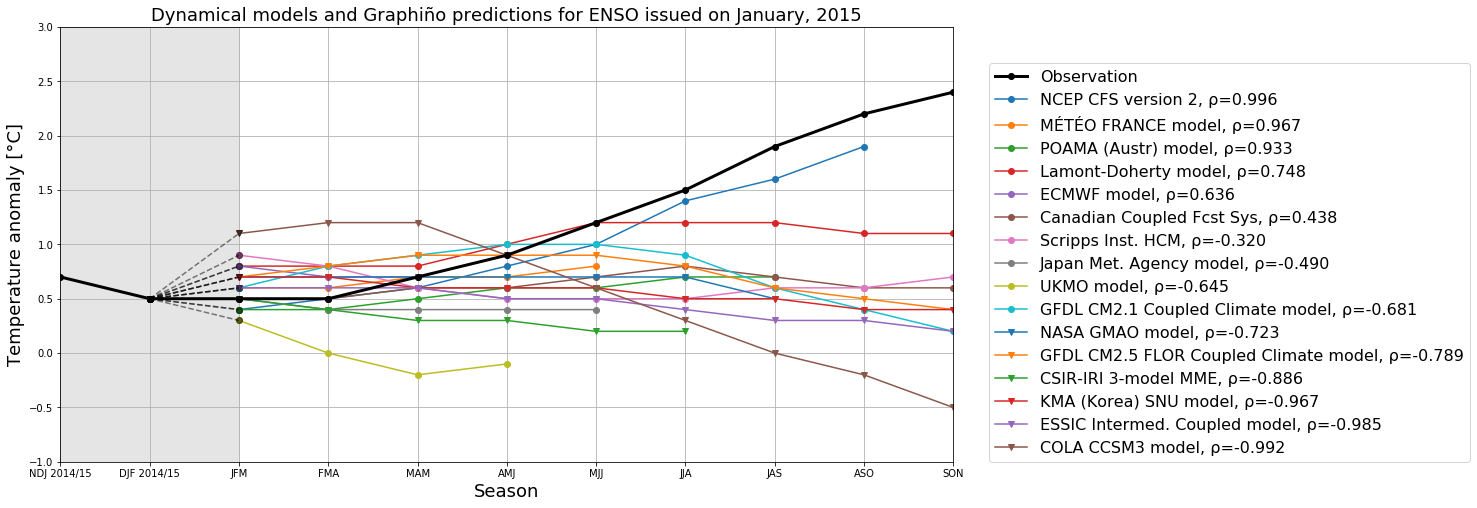

In [19]:
fig, ax = plt.subplots(figsize=(16,8))

plot_results(dynamical_data, ax)
plt.grid()
ax.set_title("Dynamical models and Graphiño predictions for ENSO issued on January, 2015", fontsize=18)

plt.legend(loc=(1.04,0.0), fontsize=16)

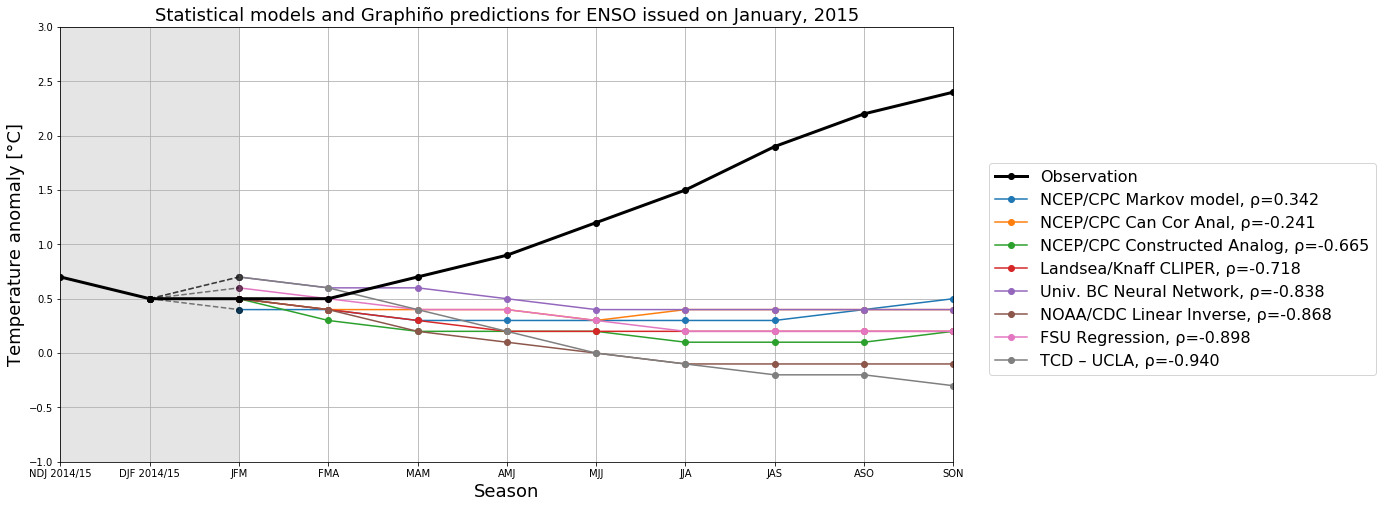

In [14]:
fig, ax = plt.subplots(figsize=(16,8))

plot_results(statistical_data, ax)
plt.grid()
ax.set_title("Statistical models and Graphiño predictions for ENSO issued on January, 2015", fontsize=18)

plt.legend(loc=(1.04,0.2), fontsize=16)